In [1]:
# This means update the tensorflow lib, it will take a while!
# about 5 - 10 mins depends on your machine / network
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 458.3 MB 83 kB/s               | 248.3 MB 7.7 MB/s eta 0:00:28 �████▏             | 259.4 MB 151.1 MB/s eta 0:00:02█            | 286.7 MB 151.1 MB/s eta 0:00:02:00:01       | 336.8 MB 151.1 MB/s eta 0:00:01a 0:00:01 
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     |████████████████████████████████| 132 kB 96.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 462 kB 85.1 MB/s            
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Preparing metadata (setup.py) ... done
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
     |████████████████████████████████

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 458.3 MB 56 kB/s                                 | 73.9 MB 18.0 MB/s eta 0:00:22��█▊                         | 96.8 MB 18.0 MB/s eta 0:00:210:24         | 332.8 MB 5.4 MB/s eta 0:00:24  


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
!pip install scikit-learn==0.23

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.3 MB 27.8 MB/s            


In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# This will take a while to download.

from sklearn.datasets import fetch_openml

# Here is the fashion dataset
from tensorflow.keras.datasets import fashion_mnist



After import required libs, we can start to load up our data.

Also we can print out some basic information about the data we have.

In [11]:



#X, y = fetch_openml('mnist_784',as_frame='auto', return_X_y=True)

# fashion: note how the split occurs autmatically for this dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# confirm we know the size of the data
print('\nSize of features:\n', trainX.shape)
print('Size of labels/targets:\n',trainy.shape)


Size of features:
 (60000, 28, 28)
Size of labels/targets:
 (60000,)


Let's see how the sample in data looks.

In [12]:

shapex = trainX[0].shape
print(shapex)
print(trainX[0])
shapey = trainy[0]
print(shapey)

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 2

### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Now let's plot some samples in our dataset.

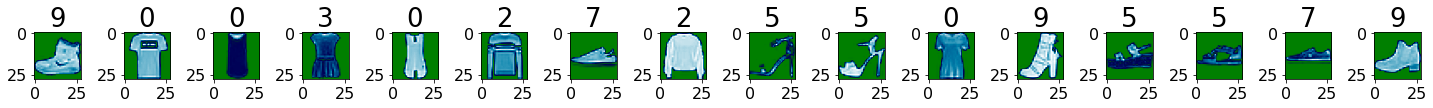

In [14]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
fig = plt.figure(figsize=(20,10))

for pic in range(16):

    # in a line
    plt.subplot(1, 16, pic+1)
    # as a grid
  
    plt.title(trainy[pic], fontsize=26)
    plt.imshow(trainX[pic].reshape(28,28), cmap = matplotlib.cm.ocean)


plt.tight_layout()

We will be using an open class from 
https://medium.com/geekculture/how-to-plot-model-loss-while-training-in-tensorflow-9fa1a1875a5 to plot the train_loss ,test_loss and train_accuracy, test_accuracy during the training.

Thanks the Author for the code!

In [15]:
from tensorflow.keras import regularizers
from IPython.display import clear_output


class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

This section below is the model building and hyperparameter tuning part. The models will take a huge ammount of time to train if you run the notebook.

In order to save time, I saved the model and the result into a github repo.

Link: https://github.com/chenqili2020/CSE404_models.git



In [36]:
from keras.models import load_model
# This is an exmaple to save model



## model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
 
# This is an exmaple to load the model up

# model1 = load_model('my_model.h5')
 


Model downloading:

In [76]:
!curl -O https://github.com/chenqili2020/CSE404_models/blob/main/model_1.h5
!curl -O https://github.com/chenqili2020/CSE404_models/blob/main/model_2.h5
!curl -O https://github.com/chenqili2020/CSE404_models/blob/main/model_3.h5
!curl -O https://github.com/chenqili2020/CSE404_models/blob/main/model_4.h5
!curl -O https://github.com/chenqili2020/CSE404_models/blob/main/model_5.h5
!curl -O https://github.com/chenqili2020/CSE404_models/blob/main/model_6.h5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k    0  120k    0     0   242k      0 --:--:-- --:--:-- --:--:--  243k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k    0  120k    0     0   287k      0 --:--:-- --:--:-- --:--:--  287k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k    0  120k    0     0   405k      0 --:--:-- --:--:-- --:--:--  406k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k    0  120k    0     0   451k      0 --:--:-- --:--:-- --:--:--  450k
  % Total    % Received % Xferd  Average Speed   Tim

## Load up actual model(uncomment the code to load the model instead of running the training again ):

Run the code to install the package to load h5 file

In [79]:
#!sudo apt-get install python3-h5py

In [83]:
# model = load_model("model_1.h5")
# model2 = load_model("model_2.h5")
# model3 = load_model("model_3.h5")
# model4 = load_model("model_4.h5")
# model5 = load_model("model_5.h5")
# model6 = load_model("model_6.h5")

In [19]:

# uncomment the code below to run on your own time.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


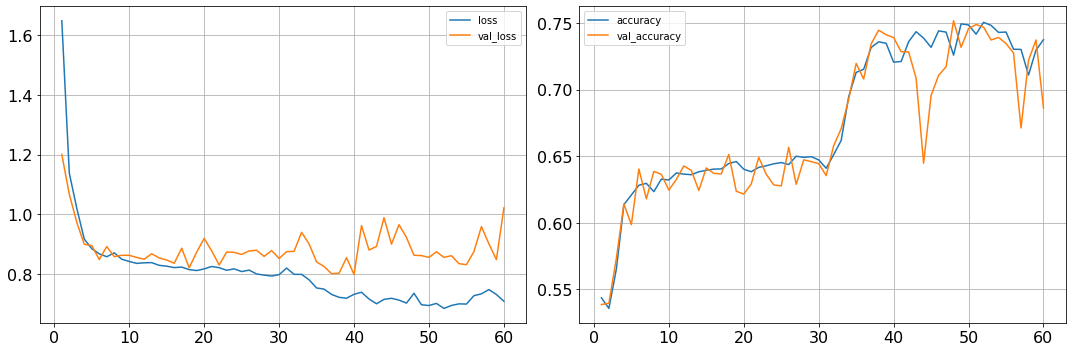

In [20]:


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callbacks_list = [PlotLearning()]
# fit model to given data
model.fit(trainX, 
          trainy,
          batch_size = 8,
          validation_split=0.2,
          epochs=60,
          callbacks=callbacks_list
          
)

## Let's see the model accuracy

In [21]:
test_loss1, test_acc1 = model.evaluate(testX,  testy, verbose=1)

print('\nTest accuracy:', test_acc1)

313/313 [==============================] - 1s 2ms/step - loss: 1.0566 - accuracy: 0.6835

Test accuracy: 0.6834999918937683


In [25]:
#This is our original plot from model1
! curl -o "plot_1.png" https://github.com/chenqili2020/CSE404_models/blob/main/%E4%B8%8B%E8%BD%BD.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k    0  120k    0     0   378k      0 --:--:-- --:--:-- --:--:--  377k


In [30]:
import IPython.display as display

image_path = "plot_1.png"
display.display(display.Image(image_path))

### Observation for model:

Around epoch #30, we observed the sign for overfittingm where the Val_accuracy drop while training accuracy still increasing.
When near the Epcoh #40, we can see that a huge drop in validation accuracy 
and validation loss, but this is still a decent model overall. 
Around Epcoh 55, while the validation accuracy seems to stay on the trend, but the validation loss is on an increasing trend.
60 epchs might be too much for this simple model.

Let's save the mode and then make a same model but will be adding regulizers to it & reduce the epcoh number.

In [38]:
model.save('model_1.h5')

In [39]:

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64,activation='relu',kernel_regularizer= regularizers.l2(0.001) ),
    keras.layers.Dense(128, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dropout(0.01),
    keras.layers.Dense(10)
])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


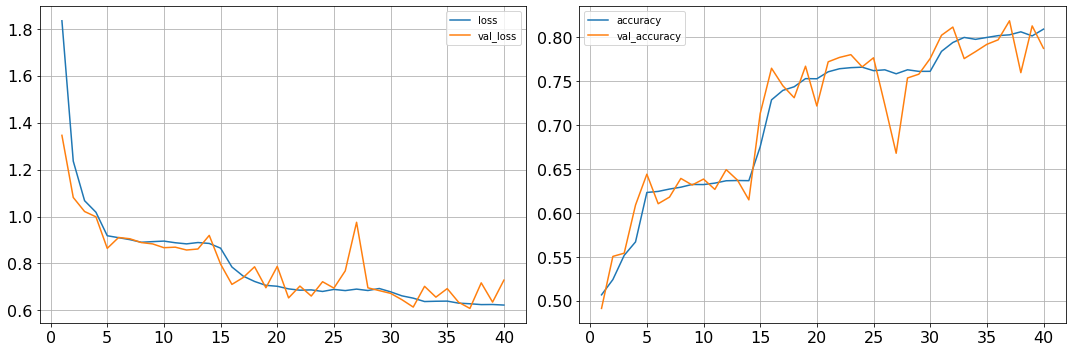

In [40]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callbacks_list2 = [PlotLearning()]
# fit model to given data
model2.fit(trainX, 
          trainy,
          batch_size =8,
          validation_split=0.2,
          epochs=40,
          callbacks=callbacks_list2
          
)

## Let's see the accuracy of this model.

In [45]:
test_loss2, test_acc2 = model2.evaluate(testX,  testy, verbose=1)

print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 1s 2ms/step - loss: 0.7356 - accuracy: 0.7820

Test accuracy: 0.7820000052452087


In [44]:
#This is our original plot from model2
! curl -o "plot_2.png" https://github.com/chenqili2020/CSE404_models/blob/main/%E4%B8%8B%E8%BD%BD%20_2.png
image_path = "plot_2.png"
display.display(display.Image(image_path))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  121k    0  121k    0     0   857k      0 --:--:-- --:--:-- --:--:--  859k


### Observation for model 2

started from Epcoh #17, we see the spikes in validation loss.

Looks like the model doesn't improve as fast as we hope for after 15 Epcohs.

Let's save this model too and make a new more complex model. 

In [46]:
model2.save('model_2.h5')

In [47]:

model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dense(256,activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dense(128, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10,activation="softmax")
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 300,938
Trainable params: 300,938
Non-trainable params: 0
________________________________________________

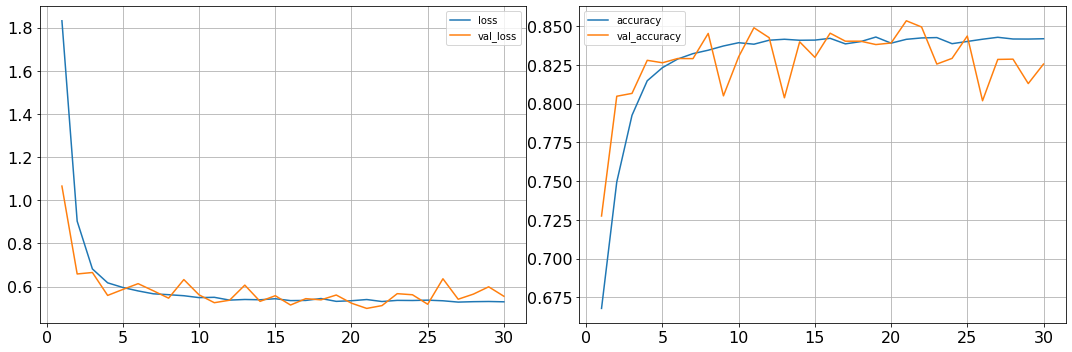

In [48]:
#opt = tf.keras.optimizers.SGD()

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callbacks_list3 = [PlotLearning()]
# fit model to given data
model3.fit(trainX, 
          trainy,
          batch_size = 8,
          validation_split=0.2,
          epochs=30,
          callbacks=callbacks_list3
          
)

In [51]:
model3.save('model_3.h5')

In [49]:
test_loss3, test_acc3 = model3.evaluate(testX,  testy, verbose=1)

print('\nTest accuracy:', test_acc3)

313/313 [==============================] - 1s 3ms/step - loss: 0.5797 - accuracy: 0.8206

Test accuracy: 0.8205999732017517


In [50]:
#This is our original plot from model2
! curl -o "plot_3.png" https://github.com/chenqili2020/CSE404_models/blob/main/%E4%B8%8B%E8%BD%BD%20_3.png
image_path = "plot_3.png"
display.display(display.Image(image_path))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  188k    0  188k    0     0   847k      0 --:--:-- --:--:-- --:--:--  851k


In [52]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(265, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10)
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_12 (Dense)             (None, 265)               135945    
_________________________________________________________________
dropout_2 (Dropout)          (None, 265)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2660      
Total params: 471,149
Trainable params: 471,149
Non-trainable params: 0
________________________________________________

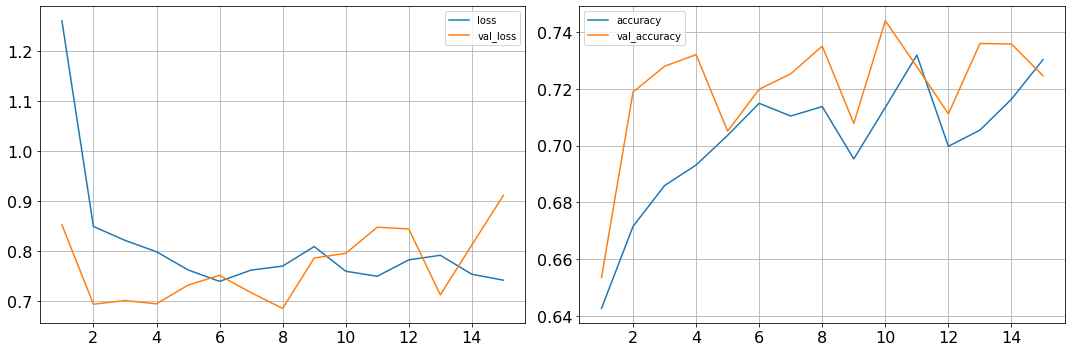

In [53]:


model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callbacks_list4 = [PlotLearning()]
# fit model to given data
model4.fit(trainX, 
          trainy,
          batch_size = 4,
          validation_split=0.2,
          epochs=15,
          callbacks=callbacks_list4
          
)

In [54]:
test_loss4, test_acc4 = model4.evaluate(testX,  testy, verbose=1)

print('\nTest accuracy:', test_acc4)

313/313 [==============================] - 1s 3ms/step - loss: 0.9506 - accuracy: 0.7234

Test accuracy: 0.7233999967575073


In [55]:
model4.save('model_4.h5')

#### This model does not perform really well, we can try to make a better one based on on observations we had and do some tuning.

In [56]:

model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64,activation='relu',kernel_regularizer= regularizers.l2(0.001) ),
    keras.layers.Dense(128, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    
    keras.layers.Dense(10)
])
model5.summary()




Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 64,074
Trainable params: 64,074
Non-trainable params: 0
__________________________________________________

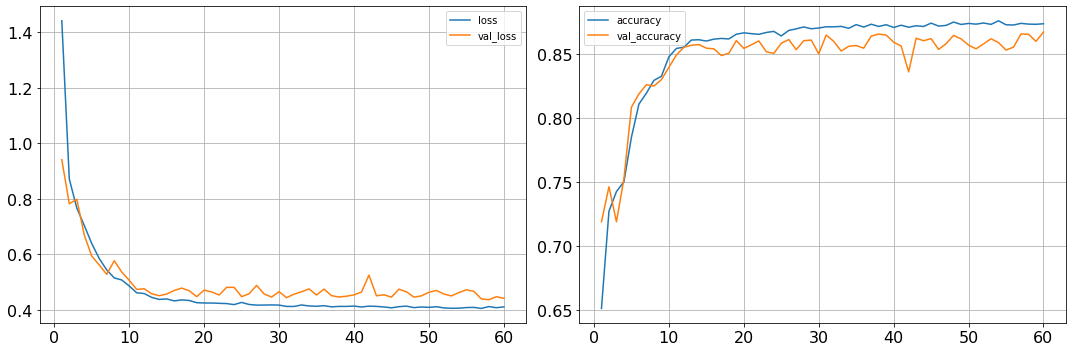

In [57]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callbacks_list5 = [PlotLearning()]
# fit model to given data
model5.fit(trainX, 
          trainy,
          validation_split=0.2,
          epochs=60,
          callbacks=callbacks_list5
)



In [61]:
model5.save('model_5.h5')

## Let's see the test accuracy.

In [58]:
test_loss5, test_acc5 = model5.evaluate(testX,  testy, verbose=1)

print('\nTest accuracy:', test_acc5)

313/313 [==============================] - 1s 2ms/step - loss: 0.4670 - accuracy: 0.8551

Test accuracy: 0.8550999760627747


## Let's see some prediction result.

In [59]:
#(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
#print(msu_win.shape)
import numpy as np
print("Prediction vs True Label")
for loop in range(10):
    img = testX[loop]
    img = (np.expand_dims(img,0))
    #print(img.shape)
    prediction = model5.predict(img)
    max_ind = np.argmax(prediction)
    
    
    print(" [{}] | {}".format(max_ind, testy[loop]))
    #print(" [{}] | {}".format(prediction, testy[loop]))




Prediction vs True Label
 [9] | 9
 [2] | 2
 [1] | 1
 [1] | 1
 [6] | 6
 [1] | 1
 [4] | 4
 [6] | 6
 [5] | 5
 [7] | 7


### Let's check the regulizer in a old fashion way.

In [60]:
print("Prediction vs True Label")
count = 0

for loop in range(100):
    img = testX[loop]
    img = (np.expand_dims(img,0))
    #print(img.shape)
    prediction = model5.predict(img)
    max_ind = np.argmax(prediction)
    if max_ind == testy[loop]: count += 1
    #plt.imshow(prediction, cmap = matplotlib.cm.ocean)
    #plt.imshow(testX[loop], cmap = matplotlib.cm.ocean)
    #print(" [{}] | {}".format(max_ind, testy[loop]))
print("The accuracy with kernel regulizer of 0.001 is ", count)

Prediction vs True Label
The accuracy with kernel regulizer of 0.001 is  87


## Summary

Our first model showed acceptable results. The greatest increase in model accuracy, for both training accuracy and validation accuracy, was found around epoch 5. We noticed around epoch 30 and onwards, the training accuracy kept a subtle growth, however the validation accuracy had frequent drops. We hypothesized this to be due o overfitting. We then planned to overcome this overfitting by changing the epoch count and batch size, as well as implemting ways to overcome overfitting like dropout training.

In model 2, we implemented kernel regularizers and dropout training. We kept the same batch size but changed the epoch count to 40 epochs. We experienced lower accuracy for both the training and validation set. We also noticed that the validation accuracy seemed to plummet around 40 epochs. And was at its highest around 15 epochs. We now planned to reduce the epoch count.

In model 3, we reduced the epoch count to 15, kept the dropout training, and added a layer of softmax activation. This gave our model much higher accuracy for both the training and validation set. However we also noticed that the validation accuracy had greater changes across epoch counts, with significant decrease compared to the training accuracy.

In model 4, we kept much of the same details as model 3, however made our batch size 4. This produced accuracies far lower and showed drastic accuracy drops after the 12 epoch. We hypothesized that the extremely small batch size lead to overfitting of the model and the lack of the softmax activation made it the model too complex.

In model 5, we simplified our model by taking the default batch size(32) and increased the epoch count to 60 again. This gave us the highest accuracy we had seen at about 88% for the training and 87% for the validation set.

## Additional

#### we see how those changes can lead to better or worse performance of the model.

now we know what will help the model's performance,ow far we can push to make it a super good model while maintain the validation accuracy high. let's make it.

In [73]:

model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(128, activation='relu',kernel_regularizer= regularizers.l2(0.001) ),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= regularizers.l2(0.001) ),
    keras.layers.Dense(128, activation='relu',kernel_regularizer= regularizers.l2(0.001) ),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= regularizers.l2(0.001) ),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10)
])
model6.summary()




Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_48 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_49 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_50 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_51 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)               

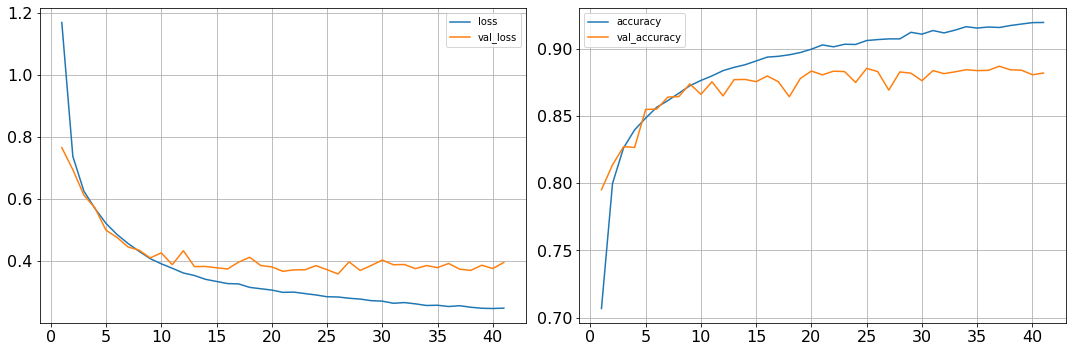

Epoch 42/60
217/750 [=======>......................] - ETA: 1s - loss: 0.2465 - accuracy: 0.9218

KeyboardInterrupt: 

In [74]:
model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callbacks_list6 = [PlotLearning()]
# fit model to given data

model6.fit(trainX, 
          trainy,
          batch_size = 64,
          validation_split=0.2,
          epochs=60,
          callbacks=callbacks_list6
)



In [75]:
test_loss6, test_acc6 = model6.evaluate(testX,  testy, verbose=1)

print('\nTest accuracy:', test_acc6)

313/313 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8751

Test accuracy: 0.8751000165939331


In [85]:
y_pred=model6.predict(testX)

In [95]:
print("Prediction vs True Label")
count = 0

pred = []
real = []

for loop in range(100):
    img = testX[loop]
    img = (np.expand_dims(img,0))
    #print(img.shape)
    
    
    prediction = model6.predict(img)
    max_ind = np.argmax(prediction)
    pred.append(max_ind)
    real.append(testy[loop])
    if max_ind == testy[loop]: count += 1
    #plt.imshow(prediction, cmap = matplotlib.cm.ocean)
    #plt.imshow(testX[loop], cmap = matplotlib.cm.ocean)
    #print(" [{}] | {}".format(max_ind, testy[loop]))

confusion = tf.math.confusion_matrix(labels=real,predictions=pred)
print("The accuracy with kernel regulizer of 0.001 is ", count)




print(confusion)

Prediction vs True Label
The accuracy with kernel regulizer of 0.001 is  88
tf.Tensor(
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  1  0  2  0  0  0]
 [ 0  0  0  6  2  0  1  0  0  0]
 [ 0  0  2  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 1  0  1  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  1  0  1  0  4]], shape=(10, 10), dtype=int32)
